Epoch: 1 | Loss: 0.2181386222121234
Epoch: 2 | Loss: 0.5115868731978325
Epoch: 3 | Loss: 0.3589775828091338
Epoch: 4 | Loss: 0.26243489558662053
Epoch: 5 | Loss: 0.22951224262913011
Epoch: 6 | Loss: 0.16624184473697853
Epoch: 7 | Loss: 0.13443644928467577
Epoch: 8 | Loss: 0.1409163201123536
Epoch: 9 | Loss: 0.14293762819031966
Epoch: 10 | Loss: 0.13298698624019686
Epoch: 11 | Loss: 0.14420828690703127
Epoch: 12 | Loss: 0.15035844045583846
Epoch: 13 | Loss: 0.13895574531095312
Epoch: 14 | Loss: 0.12663341581569765
Epoch: 15 | Loss: 0.14233917431732668
Epoch: 16 | Loss: 0.13300026595222605
Epoch: 17 | Loss: 0.18355852090658345
Epoch: 18 | Loss: 0.12908667763959747
Epoch: 19 | Loss: 0.13185738914565162
Epoch: 20 | Loss: 0.14231035575899523
Epoch: 21 | Loss: 0.13722203632604985
Epoch: 22 | Loss: 0.13310513237004415
Epoch: 23 | Loss: 0.12281060715709775
Epoch: 24 | Loss: 0.1448506155709904
Epoch: 25 | Loss: 0.1379672647558917
Epoch: 26 | Loss: 0.16761045063963478
Epoch: 27 | Loss: 0.1197391

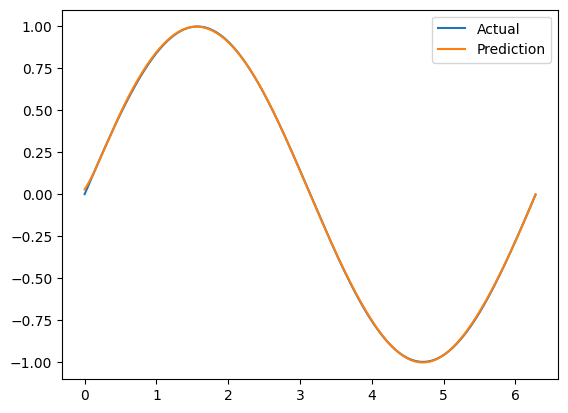

array('Flatten\nDense(1, 16)\nGeLU\nDense(16, 16)\nGeLU\nDense(16, 1)',
      dtype='<U57')

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import numpytorch as torch
import numpytorch.nn as nn
import numpytorch.optim as optim
from numpytorch.utils.data import TensorDataset

# Create a custom neural network class


class MyModel(nn.Module):
    def __init__(self):
        super().__init__()

        # Define the layers of the neural network
        self.layers = [
            nn.Flatten(),
            nn.Linear(1, 16),
            nn.GeLU(),
            nn.Linear(16, 16),
            nn.GeLU(),
            nn.Linear(16, 1),
        ]


# Create an instance of the neural network class
model1 = MyModel()

# Load the training data
X_train = np.arange(0, 2 * np.pi, 0.01).reshape(-1, 1).astype(np.float64)
y_train = np.sin(X_train).astype(np.float64)

# Create a dataset object for the training data
train_data = TensorDataset(X_train, y_train, batch_size=32, shuffle=True)


# Define the loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model1.layers, lr=0.01)


# Training Loop
epochs = 500
for epoch in range(epochs):
    running_loss_train = 0

    # Iterate over the batches of the training data
    for i, (batch_X, batch_y) in enumerate(train_data):
        # Forward pass
        y_pred = model1.forward(batch_X)

        # Compute the loss
        loss = loss_fn.forward(y_pred=y_pred, y_true=batch_y).mean()

        # Backpropagate the loss
        grad = loss_fn.backward(y_pred=y_pred, y_true=batch_y)
        model1.backward(grad)

        # Update the parameters
        optimizer.step()

        # Accumulate the running loss
        running_loss_train += loss

    # Average the running loss
    running_loss_train /= len(train_data)

    #                  rint the epoch number and the loss
    print(f"Epoch: {epoch+1} | Loss: {running_loss_train}")


# Try plotting the results

train_pred = model1.forward(X_train)

# plt.scatter(X_train, train_pred)
plt.plot(X_train, y_train, label='Actual')
plt.plot(X_train, train_pred, label='Prediction')
plt.legend()
plt.show()


# Save the model weights
model1.save('sin-model-1')


# Load model
loaded_model = MyModel()  # Random weights
loaded_model.load('sin-model-1.npz')  # Loads saved weights into loaded_model